#Predicting Images of Common Objects using CNN by Dr Alvin Ang



---



the code presented here uses colored images... which means it takes a long time for epochs processing to run... very very slow...

if you wish to convert these images to grayscale (so that you can train the model faster), u may follow the code here:

https://becominghuman.ai/cifar-10-image-classification-fd2ace47c5e8

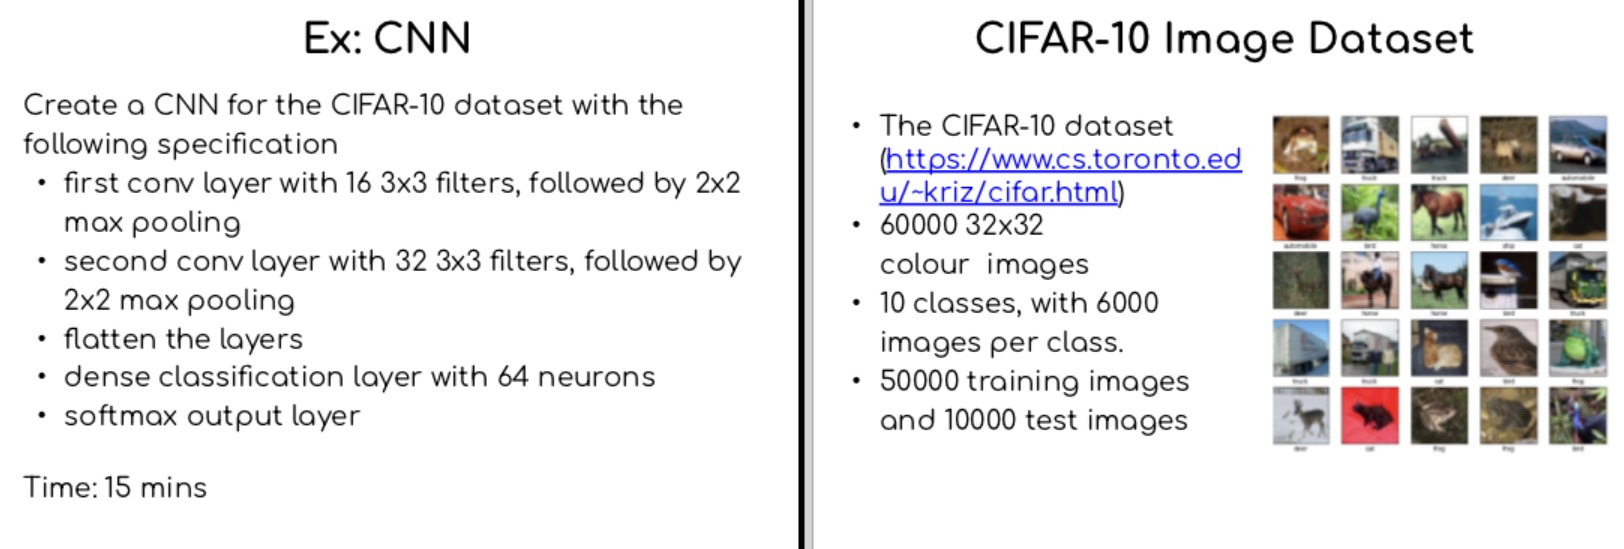

https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

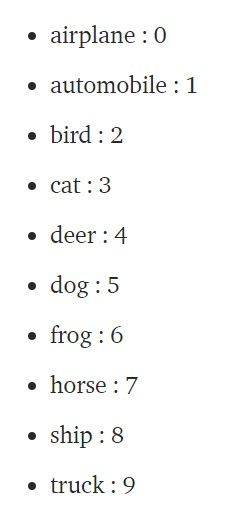



---



#Step 1: Load Data

##1a) Import All Libraries

In [136]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

##1b) Import the CIFAR-10 Data + Train Test Split 

In [137]:
import tensorflow as tf
from tensorflow import keras

cifar10 = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

##1c) Visualize the Data

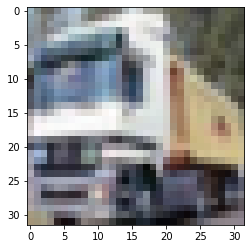

In [138]:
plt.imshow(x_train[1])

In [139]:
x_train[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

In [140]:
x_train[1].shape

#we see that the image in x_train[1] is represented by 32 rows x 32 columns of data
#with 3 channels (RGB)
#each represents 0 (black) to 255 (white)

(32, 32, 3)

In [141]:
y_train[1]
# 9 is a truck

array([9], dtype=uint8)

In [142]:
display (y_train)

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [143]:
print(len(np.unique(y_train)))
#to see how many classes there are ... 10 classes

10


Label: [6]


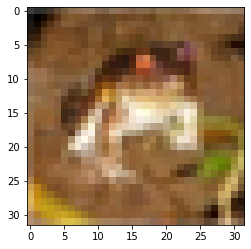

Label: [9]


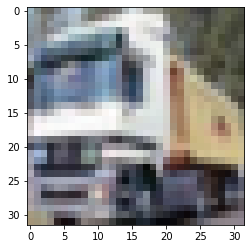

Label: [9]


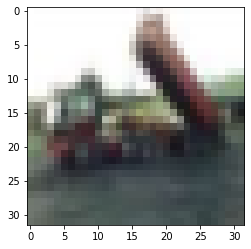

Label: [4]


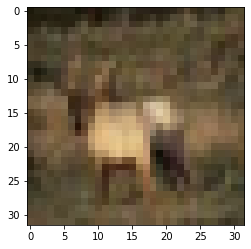

Label: [1]


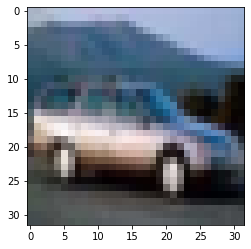

In [144]:
for i in range(5):
  print(f'Label: {y_train[i]}')
  plt.imshow(x_train[i])
  plt.show()

##1d) Normalize the Data

In [145]:
x_train, x_test = x_train/255, x_test/255

#pictures are from grayscale 0 to 255, so we divide by 255 to 
#normalize from 0 to 1 probability

#0 is pure black
#255 (or 1) is pure white

##1e) Reshape the Data

In [146]:
print(f'Before: {x_train.shape}')
print(f'Before: {x_test.shape}')

#this means there are 50k images inside x_train which are 32x32 pixels
#and there are 10k images inside x_test 

Before: (50000, 32, 32, 3)
Before: (10000, 32, 32, 3)


In [147]:
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]
print(f'After: {x_train.shape}')
print(f'After: {x_test.shape}')

#this means that we convert the x_train and x_test to include another parameter (or dimension)
#purpose is to 'fit' in the CNN layer later

#NOTE: EACH TIME YOU RUN THIS CODE IT WILL ADD ANOTHER DIMESION (so don't run it too many times!)
#e.g. 1st time (..., 32, 32, 3, 1)
#e.g. 2nd time (..., 32, 32, 3, 1, 1)... and so forth

After: (50000, 32, 32, 3, 1)
After: (10000, 32, 32, 3, 1)


In [13]:
#alternatively, to RESHAPE the data... you can try
#x_train = x_train.reshape((50000, 32, 32, 3))
#x_test = x_test.reshape((10000, 32, 32, 3))



---



#Step 2: Build the Model

In [148]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
                    
#Convolution Layer
    Conv2D(filters = 16, 
           kernel_size = (3, 3), 
           activation = 'relu', 
           input_shape = (32,32,3)),

#Pooling Layer
    MaxPooling2D((2,2)),

#Convolution Layer
    Conv2D(32, (3, 3), activation = 'relu'),

#Pooling Layer
    MaxPooling2D((2, 2)),
    
#ANN Layers
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

##2a) Model Summary

In [149]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 32)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 1152)              0         
                                                                 
 dense_12 (Dense)            (None, 64)               

##2b) Model Visualization

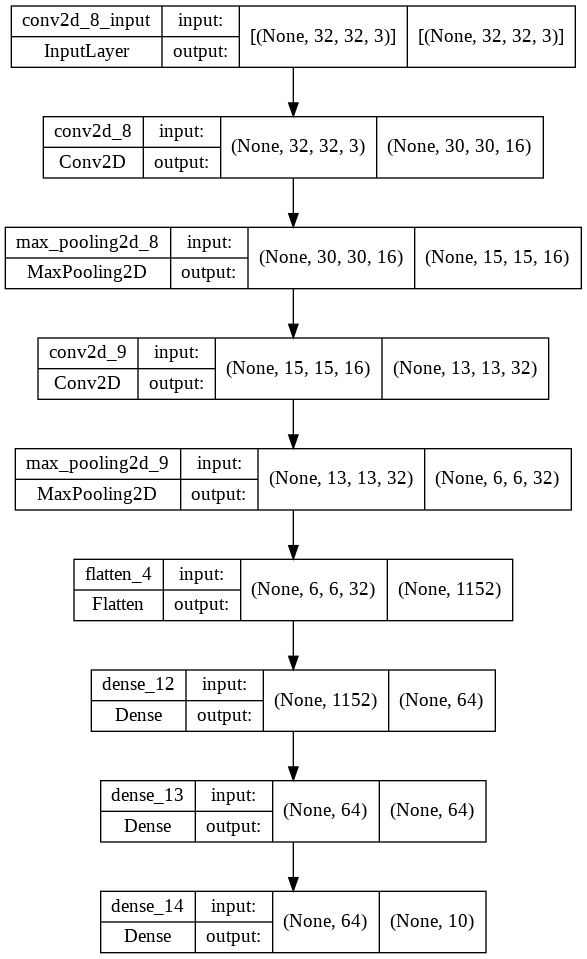

In [150]:
import pydot
keras.utils.plot_model(model, 'model.png', show_shapes=True)



---



#Step 3: Compile the Model

In [151]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

#sparse_categorical_crossentropy is slower to train
#but easier to code
#try converting to categorical_crossentropy for faster

#sparse_categorical_crossentropy dun need "One-Hot Encoding" for 
#both inputs and outputs

#adam is for cross entropy --> Classification
#RMSprop is for Regression



---



#Step 4: Train the Model

In [158]:
history = model.fit(
    x_train, y_train,
    epochs = 4,
    validation_data = (x_test, y_test)
)

Epoch 1/4
1563/1563 [==============================] - 43s 27ms/step - loss: 1.0616 - accuracy: 0.6260 - val_loss: 1.0281 - val_accuracy: 0.6404
Epoch 2/4
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9753 - accuracy: 0.6577 - val_loss: 1.0110 - val_accuracy: 0.6470
Epoch 3/4
1563/1563 [==============================] - 37s 24ms/step - loss: 0.9100 - accuracy: 0.6800 - val_loss: 1.0031 - val_accuracy: 0.6543
Epoch 4/4
1563/1563 [==============================] - 37s 23ms/step - loss: 0.8565 - accuracy: 0.7000 - val_loss: 0.9757 - val_accuracy: 0.6658




---



#Step 5: Save the Model

In [29]:
model.save('classifying_common_objects.h5')

#h5 means HDF5 format
#it saves the model configuration, weights, biases and all hyperparameters



---



#Step 6: Load the Model

In [ ]:
# model = keras.models.load_model('classifying_common_objects.h5')

#though not needed here, we will load this model for future use
#so that we don't have to run the 100 epochs as it takes very long



---



#Step 7: Running a Prediction

##7a) Importing Image Reshaping Libraries

In [159]:
import numpy as np
import cv2
from skimage import img_as_ubyte
from skimage.color import rgb2gray
from keras.models import load_model

##7b) Importing and Previewing the Frog Image

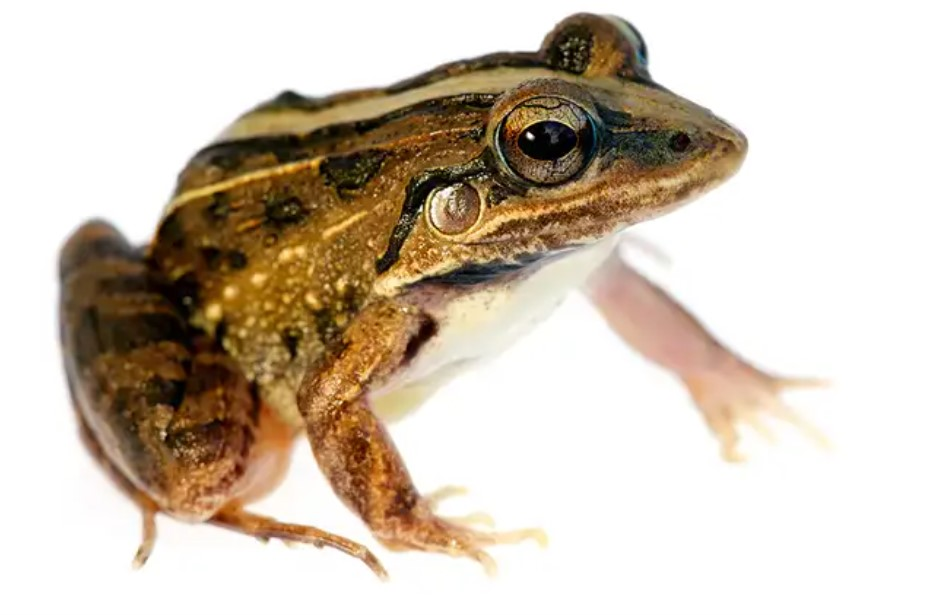

In [160]:
img_1 = cv2.imread("/content/frog.jpg", 1)  # 0 means grayscale

##7c) Re-Coloring / Re-Shaping / Re-Sizing

In [162]:
img_2 = cv2.resize(img_1, (32, 32)) #give a shape of (32, 32, 3)

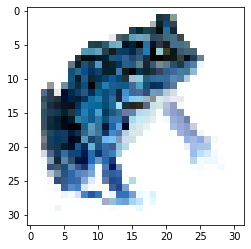

In [163]:
plt.imshow(img_2)

In [165]:
img_3 = np.expand_dims(img_2, 0) #give a shape of (1, 32, 32, 3), 0 means first dim

##7d) Predicting

In [166]:
ans = model.predict(img_3)

In [167]:
ans = np.argmax(ans, axis = 1)[0]
print(ans)

# 6 its a frog! YIPPIES! WE DID IT!!

6




---



#Step 8: Visualize the Loss or Error

In [169]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epoch = range(len(loss))

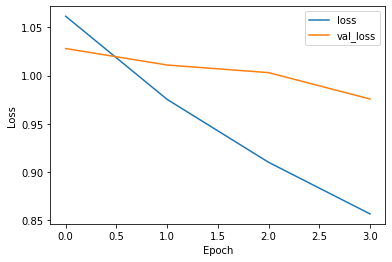

In [170]:
import matplotlib.pyplot as plt

plt.plot(epoch, loss, label = "loss")
plt.plot(epoch, val_loss, label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



---



#Step 9: Visualize the Accuracy

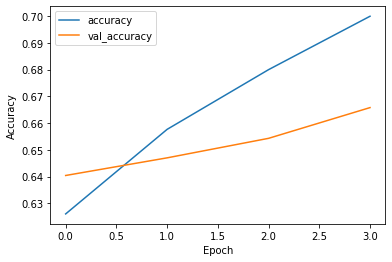

In [171]:
plt.plot(epoch, acc, label = 'accuracy')
plt.plot(epoch, val_acc, label = 'val_accuracy')
plt.xlabel("Epoch")
plt.ylabel('Accuracy')
plt.legend()
plt.show()



---



#Step 10: Evaluate the Model

In [172]:
loss, acc = model.evaluate(x_test, y_test, verbose = 2)

print(f'Accuracy: {acc:5.2%}') 

#Accuracy achieved 66% after 4 epochs

313/313 - 2s - loss: 0.9757 - accuracy: 0.6658 - 2s/epoch - 7ms/step
Accuracy: 66.58%




---

#THE END



---

